In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Maas, Yuri (1024785)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

(length: 0)



Max val score: 84.85%


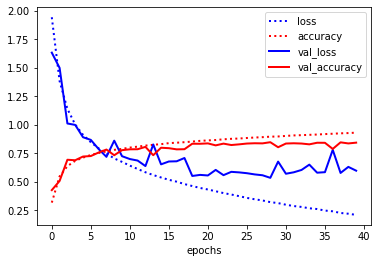

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 2000)              6146000   
_________________________________________________________________
dense_38 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_39 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_40 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_41 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_42 (Dense)             (None, 10)               

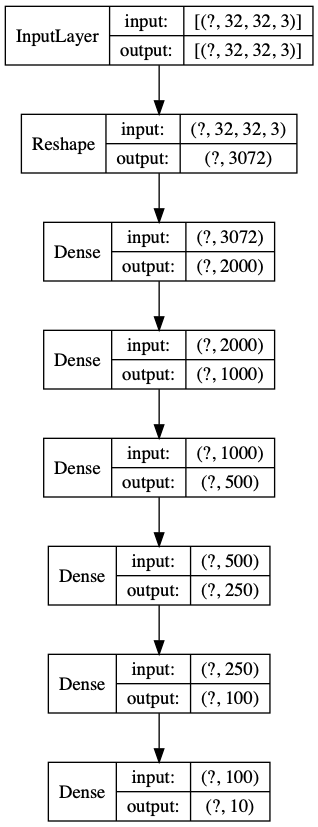

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

(length: 0)



Max val score: 86.03%


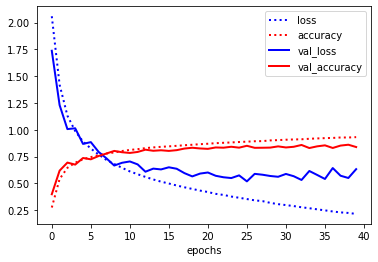

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_22 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_127 (Dense)            (None, 2000)              2050000   
_________________________________________________________________
dense_128 (Dense)            (None, 1000)              2001000   
_________________________________________________________________
dense_129 (Dense)            (None, 500)               500500    
_________________________________________________________________
dense_130 (Dense)            (None, 250)               125250    
_________________________________________________________________
dense_131 (Dense)            (None, 100)               25100     
_________________________________________________________________
dense_132 (Dense)            (None, 10)              

def build_model_1_2():
  # Copy of model 1_1 with different input shape
  model = Sequential()
  # Reshape the 32 by 32 with 3 color channels 3d tensor to a 1d tensor with 3072 values per picture
  model.add(Reshape((32*32, ), input_shape=(32,32,1)))
  model.add(Dense(2000, activation='relu'))
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(500, activation='relu'))
  model.add(Dense(250, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model



In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

(length: 0)



Max val score: 81.57%


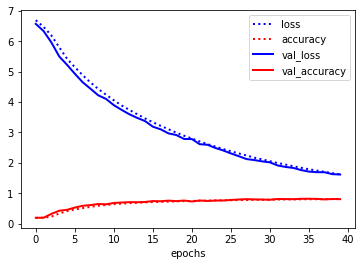

def build_model_1_3(hp=None):
  # Copy of model 1_2 with regularization
  rate = 0.2
  model = Sequential()
  # Reshape the 32 by 32 with 3 color channels 3d tensor to a 1d tensor with 3072 values per picture
  model.add(Reshape((32*32, ), input_shape=(32,32,1)))
  if hp is None:
      model.add(Dense(2400, activation='relu', kernel_regularizer=l2(0.001)))
      model.add(Dropout(rate))
      model.add(Dense(1400, activation='relu', kernel_regularizer=l2(0.001)))
      model.add(Dropout(rate))
      model.add(Dense(700, activation='relu', kernel_regularizer=l2(0.001)))
      model.add(Dropout(rate))
      model.add(Dense(200, activation='relu', kernel_regularizer=l2(0.001)))
      model.add(Dropout(rate))
      model.add(Dense(60, activation='relu', kernel_regularizer=l2(0.001)))
      model.add(Dropout(rate))
      model.add(Dense(10, activation='softmax'))
      model.compile(optimizer=SGD(learning_rate=0.00565),
                    loss='categorical_crossentropy',
                  

In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

(length: 0)



Max val score: 91.05%


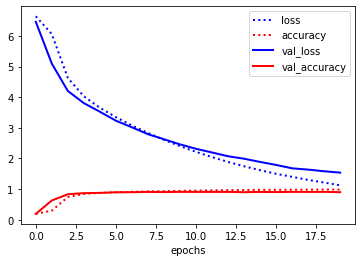

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 32, 32, 64)        1664      
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 28, 28, 64)        102464    
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 12, 12, 128)       204928    
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 10, 10, 256)       295168    
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 8, 8, 256)         590080    
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 6, 6, 256)         590080    
_________________________________________________________________
flatten_12 (Flatten)         (None, 9216)            

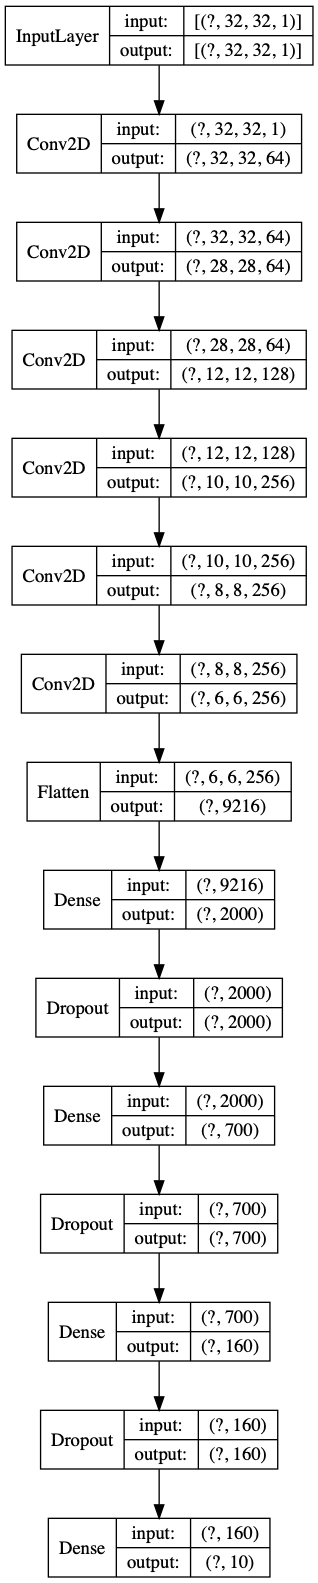

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

(length: 0)



Max val score: 94.41%


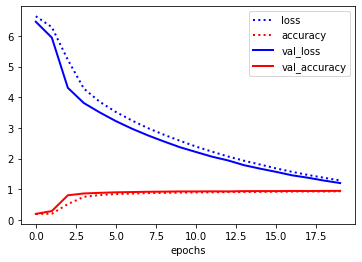


    datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.20, width_shift_range=0.05, height_shift_range=0.05)


In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

(length: 0)

Test score: 0.94%



Confusion matrix (true label on the y-axis, predicted label on the x-axis)
            1     2     3     4     5     6     7     8     9     0 Total 
    1:   3616    39    34    25    11     6    36     5     6    14  3792
    2:     16  2861    20    10     6     2    16     9     6     1  2947
    3:     16    29  2141     2    40     7     9    12    12     8  2276
    4:     37    13    16  1896     9     9     0     6     8     2  1996
    5:     10     9    62     5  1731    20     0     5    11     0  1853
    6:     11     9    17     2    30  1436     1    19     4    12  1541
    7:     45    34    29     5     2     5  1396     0     2     5  1523
    8:     11     9    25     3     8    27     1  1237    14     6  1341
    9:      6    30    18     3    14     2     2     9  1156    11  1251
    0:     14    13     9     7     3    11     1     5    11  1264  1338
Total:   3782  3046  2371  1958  1854  1525  1462  1307  1230  1323 19858


#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

(length: 0)



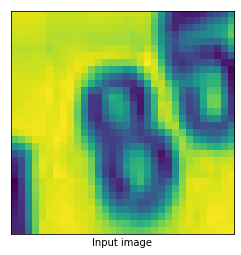

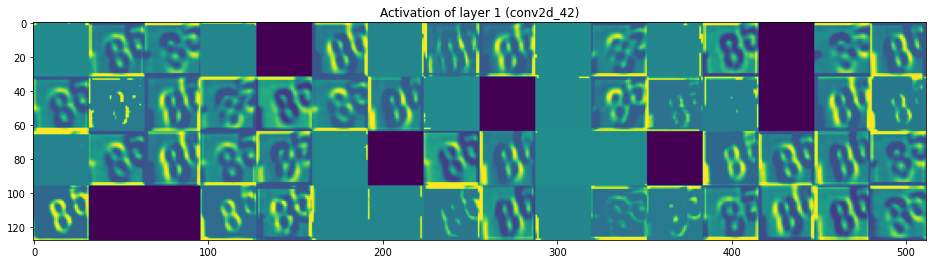

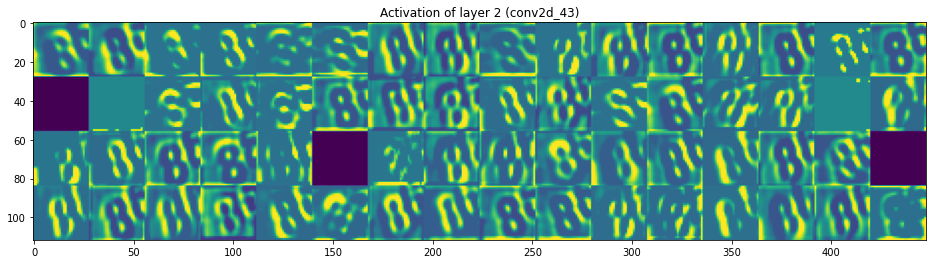

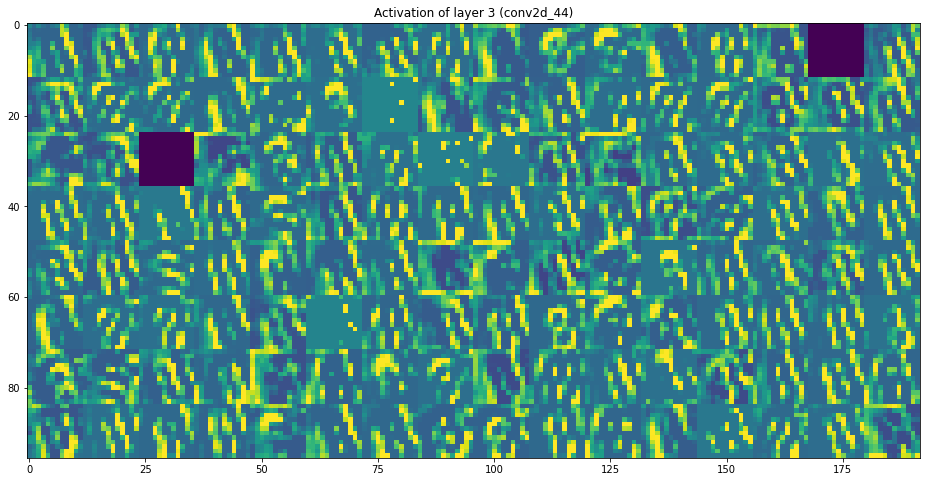

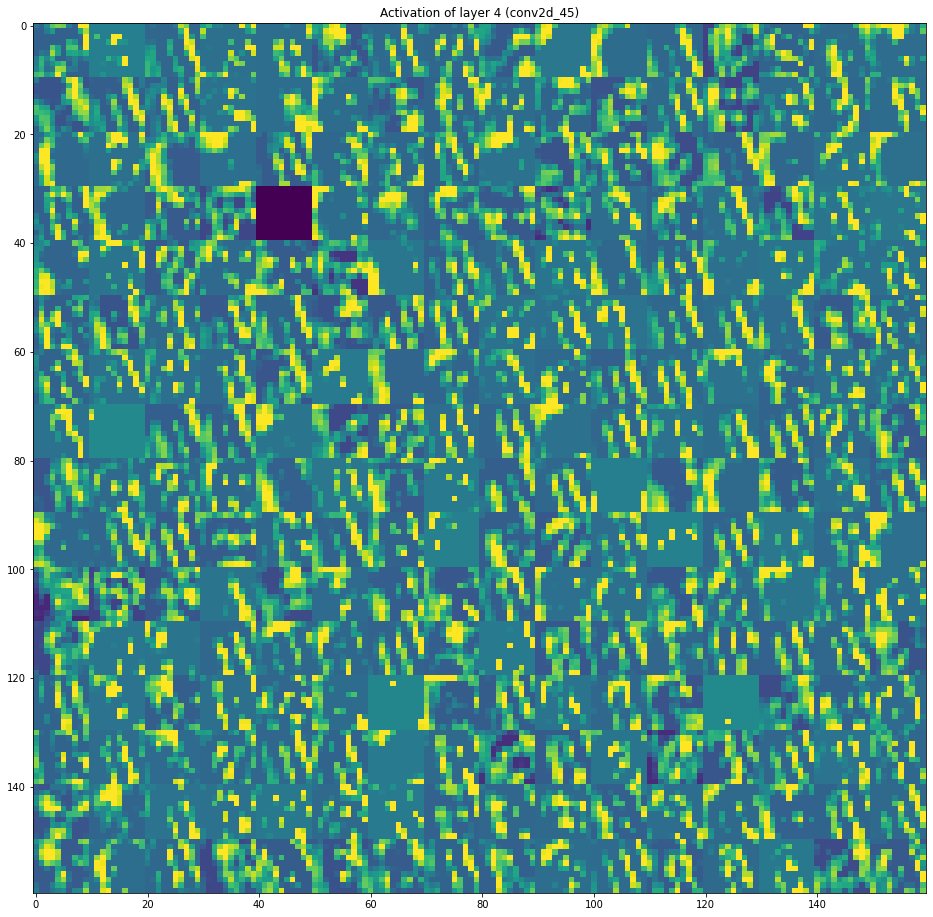

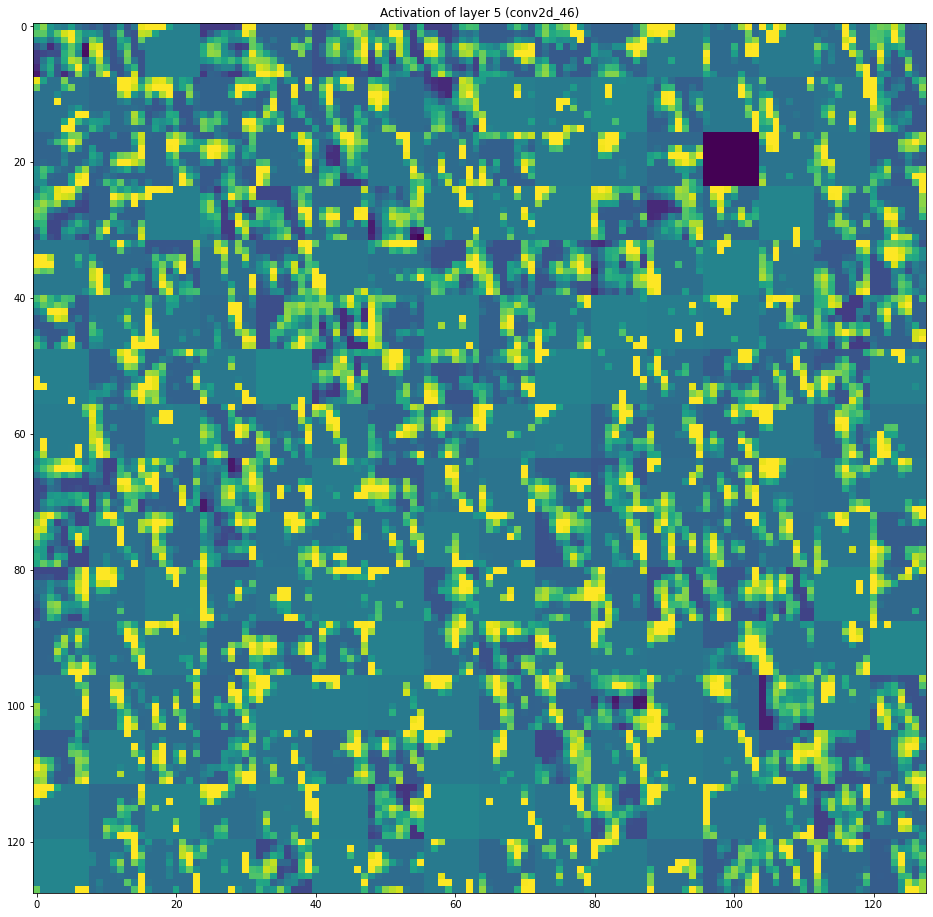

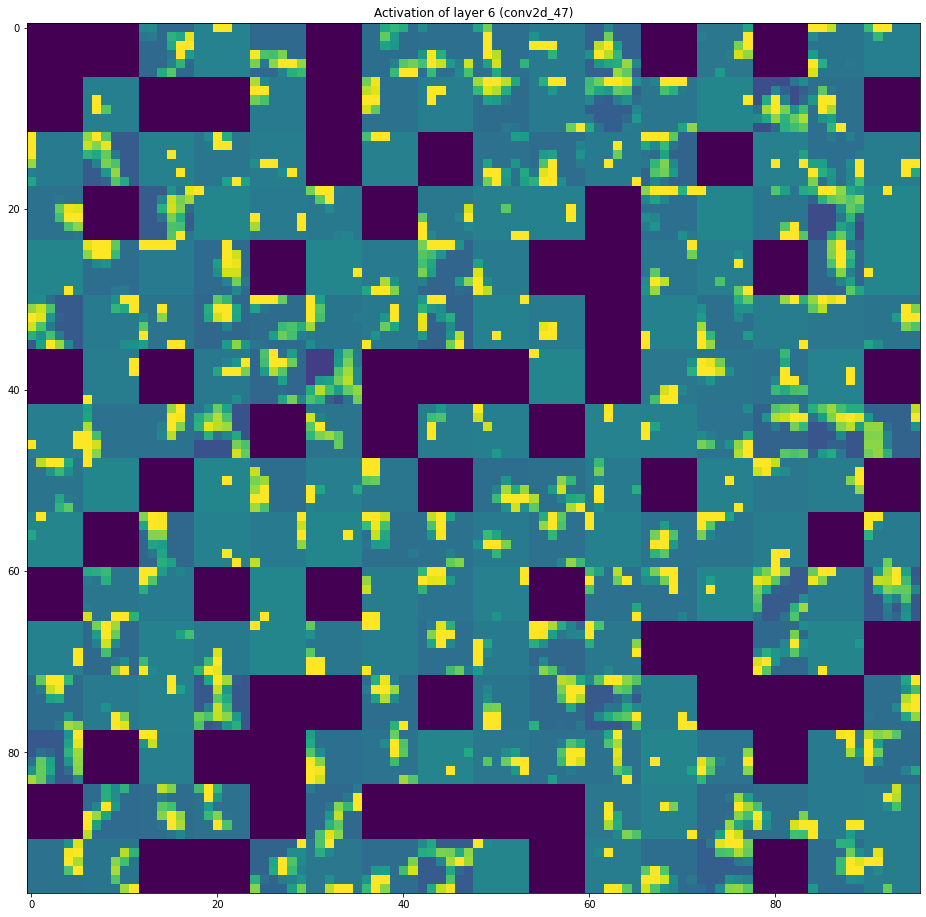

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

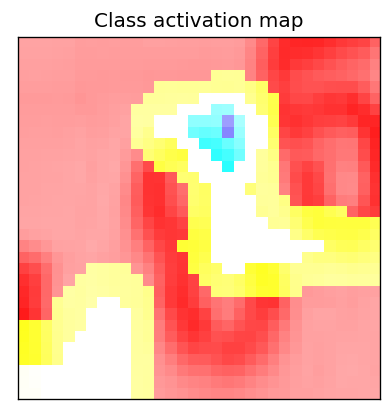

def plot_3_3():
    wanted_output = model_2_2.output[:, 7]
    # the last convolutional layer in model_2_2
    last_conv_layer = model_2_2.get_layer('conv2d_47')
    grads = K.gradients(wanted_output, last_conv_layer.output)[0]

    # is the mean intensity of the gradient over a specific feature map channel
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    # This function allows us to access the values of the quantities we just defined:
    # `pooled_grads` and the output feature map of `conv149`,
    # given a sample image
    iterate = K.function([model_2_2.input], [pooled_grads, last_conv_layer.output[0]])

    test_image = np.expand_dims(processed_split[1][0], axis=0)
    # These are the values of these two quantities, as Numpy arrays,
    # given our sample image of two elephants
    pooled_grads_value, conv_layer_output_value = iterate(test_image)

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the elephant clas

In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

(length: 0)



Max val score: 92.03%


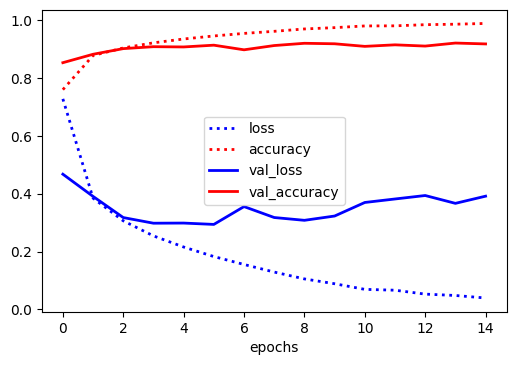

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)                5130      
Total params: 14,719,818
Trainable params: 12,984,330
Non-trainable params: 1,735,488
_________________________________________________________________
None
def build_model_4_1():
    vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    model = Sequential()
    model.add(vgg)
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    for layer in vgg.layers:
        if layer.name in ['block4_conv1', 'block4_conv2', 'block4_conv3',
                          'block5_co

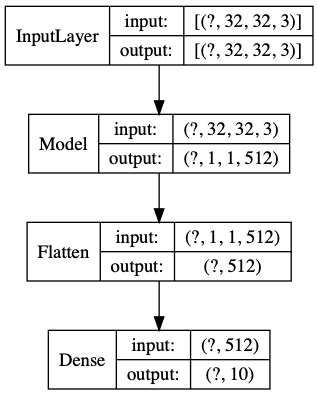

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

(length: 0)

Pipeline(steps=[('classifier', RandomForestClassifier(n_jobs=-1))])
def store_embeddings():
    """ Stores all necessary embeddings to file """
    # Create a keras function to gain data from flatten layer
    model = load_model_from_file(base_dir, 'model_4_1')
    output_layer = model.get_layer('flatten_15').output
    func = K.function([model.input, K.learning_phase()], output_layer)
    # Embed the data in batches, then store all data
    # Note, some data gets lost
    for data, name in [(X_train_all, 'X_train'), (X_test, 'X_test')]:
        print("Embedding {}".format(name), len(data))
        embedded = [func([np.expand_dims(image, axis=0), 1.]) for image in data]
        embedded = np.array(embedded)
        print(embedded.shape)
        store_embedding(embedded, name)
        del embedded
    print("Store labels")
    store_embedding(y_train_all, 'y_train')
    store_embedding(y_test, 'y_test')

def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ Runs 'ev

In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 160.30 seconds
Last modified: May 26, 2020
scikit-learn version: 0.23.1
